In [5]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [6]:
df = pd.read_csv("chicago_taxi.csv")

In [7]:
df.head(4)

,Trip ID,Taxi ID,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,...,Extras,Trip Total,Payment Type,Company,Pickup Centroid Latitude,Pickup Centroid Longitude,Pickup Centroid Location,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Dropoff Centroid Location
0,fec6b8b1c5cd7af9e6dc4e9c8c46fb08987f2e9c,56a1119c6ca57e39525cf06829f9ecff553cf4b5ac2482...,01/24/2020 12:15:00 AM,01/24/2020 12:15:00 AM,322.0,0.80,NaN,NaN,8.0,28.0,...,0.0,5.75,Cash,Medallion Leasin,41.899602,-87.633308,POINT (-87.6333080367 41.899602111),41.874005,-87.663518,POINT (-87.6635175498 41.874005383)
1,ff5cad1f181d44fe60b9d0a1330f78269511d54a,6acd828b5cde8b4529317e8eda5b4fb9663fa81d1143c9...,01/24/2020 12:15:00 AM,01/24/2020 12:30:00 AM,671.0,5.17,NaN,NaN,8.0,3.0,...,0.0,16.75,Credit Card,Chicago Carriage Cab Corp,41.899602,-87.633308,POINT (-87.6333080367 41.899602111),41.965812,-87.655879,POINT (-87.6558787862 41.96581197)
2,fbe685844176dd7822b6e256efce7fa3f8909e4b,b968bad5a2daed924a10e8ec4fb35513e060a076c575f7...,01/24/2020 12:15:00 AM,01/24/2020 12:30:00 AM,960.0,0.40,NaN,NaN,8.0,3.0,...,0.0,22.60,Credit Card,Taxi Affiliation Services,41.899602,-87.633308,POINT (-87.6333080367 41.899602111),41.965812,-87.655879,POINT (-87.6558787862 41.96581197)
3,fddd99b2c6db17848390d4b57e7fff970e22b413,a4e718943931c99476ac0b332bb99261dd8e15994076bf...,01/24/2020 12:15:00 AM,01/24/2020 12:15:00 AM,120.0,0.00,1.703108e+10,1.703108e+10,8.0,8.0,...,0.0,4.00,Cash,Blue Ribbon Taxi Association Inc.,41.892508,-87.626215,POINT (-87.6262149064 41.8925077809),41.892508,-87.626215,POINT (-87.6262149064 41.8925077809)


In [8]:
df.dtypes

Trip ID                        object
Taxi ID                        object
Trip Start Timestamp           object
Trip End Timestamp             object
Trip Seconds                  float64
Trip Miles                    float64
Pickup Census Tract           float64
Dropoff Census Tract          float64
Pickup Community Area         float64
Dropoff Community Area        float64
Fare                          float64
Tips                          float64
Tolls                         float64
Extras                        float64
Trip Total                    float64
Payment Type                   object
Company                        object
Pickup Centroid Latitude      float64
Pickup Centroid Longitude     float64
Pickup Centroid Location       object
Dropoff Centroid Latitude     float64
Dropoff Centroid Longitude    float64
Dropoff Centroid  Location     object
dtype: object

## We will work on 'Pickup Centroid Latitude' and 'Pickup Centroid Longitude'

In [9]:
new_df = df.iloc[:,17:19]
new_df

,Pickup Centroid Latitude,Pickup Centroid Longitude
0,41.899602,-87.633308
1,41.899602,-87.633308
2,41.899602,-87.633308
3,41.892508,-87.626215
4,41.874005,-87.663518
...,...,...
292777,41.874005,-87.663518
292778,41.874005,-87.663518
292779,41.892508,-87.626215
292780,41.899602,-87.633308


In [16]:
new_df.dtypes

Pickup Centroid Latitude     float64
Pickup Centroid Longitude    float64
dtype: object

In [17]:
new_df.describe()

,Pickup Centroid Latitude,Pickup Centroid Longitude
count,273071.000000,273071.000000
mean,41.897719,-87.664942
std,0.043462,0.083364
min,41.660136,-87.913625
25%,41.880994,-87.649489
50%,41.890922,-87.632746
75%,41.899602,-87.626146
max,42.009623,-87.534903


## Checking the number of null values in the dataset

In [18]:
new_df.isnull().sum()

Pickup Centroid Latitude     19711
Pickup Centroid Longitude    19711
dtype: int64

## Removing null values

In [19]:
new_df = new_df.dropna()
new_df.isnull().sum()

Pickup Centroid Latitude     0
Pickup Centroid Longitude    0
dtype: int64

### Let's look at the data on a scatterplot

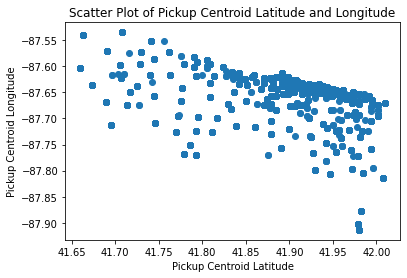

In [10]:
plt.scatter(new_df['Pickup Centroid Latitude'], new_df['Pickup Centroid Longitude'])
plt.ylabel("Pickup Centroid Longitude")
plt.xlabel("Pickup Centroid Latitude")
plt.title("Scatter Plot of Pickup Centroid Latitude and Longitude")
plt.show()

#### As the dataset is not too dense, we will use KMeans, as it is the most simplest and fastest clustering algorithm

### Getting the inertia value for different k-means

In [11]:
# Let's look at the inertia from 2 - 20, plot it and find the right number using the elbow method.
kmeans_inertia = pd.DataFrame(data=[], index=range(2, 21), columns=['inertia'])

n_init = 10
max_iter = 300
tol = 0.0001
random_state = 663

for n_clusters in range(2, 21):
    kmeans = KMeans(n_clusters=n_clusters, n_init=n_init, max_iter=max_iter, tol=tol, random_state=random_state)
    cutoff = 99
    kmeans.fit(new_df)
    kmeans_inertia.loc[n_clusters] = kmeans.inertia_

## Plotting the inertia (The Elbow Curve)

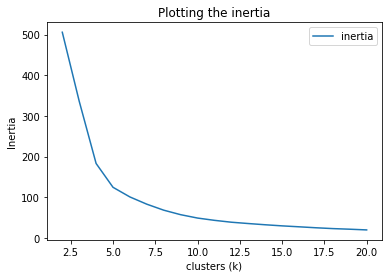

In [12]:
# Graph kmeans_inertia
# This should be unsurprising -- as we increase the number of clusters, the inertia falls
# ... and the performance increases
ax = plt.gca()

kmeans_inertia.plot(kind='line', y='inertia', ax=ax)
ax.set_xlabel('clusters (k)')
ax.set_ylabel('Inertia')
plt.title("Plotting the inertia")
plt.show()

## From the diagram above we can say that 5 or 4 clusters would be appropritate
### So we test for both
### Testing for 5 Clusters

In [13]:
kmeans5 = KMeans(n_clusters=5)
model_5 = kmeans5.fit(new_df)
y_kmeans5 = kmeans5.fit_predict(new_df)
print(y_kmeans5)

[0 0 0 ... 0 0 0]


In [14]:
kmeans5.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [15]:
kmeans5.cluster_centers_

array([[ 41.88714129, -87.63247869],
       [ 41.97948163, -87.90583275],
       [ 41.96213997, -87.68054314],
       [ 41.79712832, -87.75226382],
       [ 41.76293879, -87.60845703]])

In [16]:
# Input data
X = new_df.values
X

array([[ 41.89960211, -87.63330804],
       [ 41.89960211, -87.63330804],
       [ 41.89960211, -87.63330804],
       ...,
       [ 41.87400538, -87.66351755],
       [ 41.89250778, -87.62621491],
       [ 41.89960211, -87.63330804]])

In [17]:
new_df_label = new_df.copy()
new_df_label['label'] = pd.Series(kmeans5.labels_, index=new_df.index)
colors = ["black", "yellow", "green", "blue", "red"]
new_df_label['color'] = new_df_label['label'].map(lambda k: colors[k])
new_df_label

,Pickup Centroid Latitude,Pickup Centroid Longitude,label,color
0,41.899602,-87.633308,0,black
1,41.899602,-87.633308,0,black
2,41.899602,-87.633308,0,black
3,41.892508,-87.626215,0,black
4,41.874005,-87.663518,0,black
...,...,...,...,...
292776,41.944227,-87.655998,2,green
292777,41.874005,-87.663518,0,black
292778,41.874005,-87.663518,0,black
292779,41.892508,-87.626215,0,black


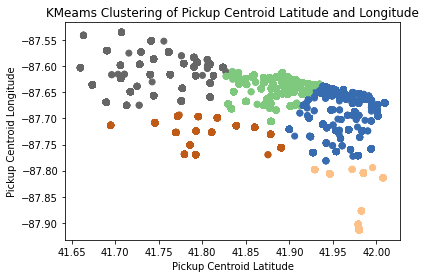

In [18]:
plt.scatter(X[:, 0], X[:, 1], c = y_kmeans5, cmap = 'Accent')
plt.ylabel("Pickup Centroid Longitude")
plt.xlabel("Pickup Centroid Latitude")
plt.title("KMeams Clustering of Pickup Centroid Latitude and Longitude")
plt.show()

In [19]:
centroids = pd.DataFrame(model_5.cluster_centers_, columns=["x1", "x2"])
centroids

,x1,x2
0,41.887141,-87.632479
1,41.979482,-87.905833
2,41.962140,-87.680543
3,41.797128,-87.752264
4,41.762939,-87.608457


<Figure size 504x504 with 0 Axes>

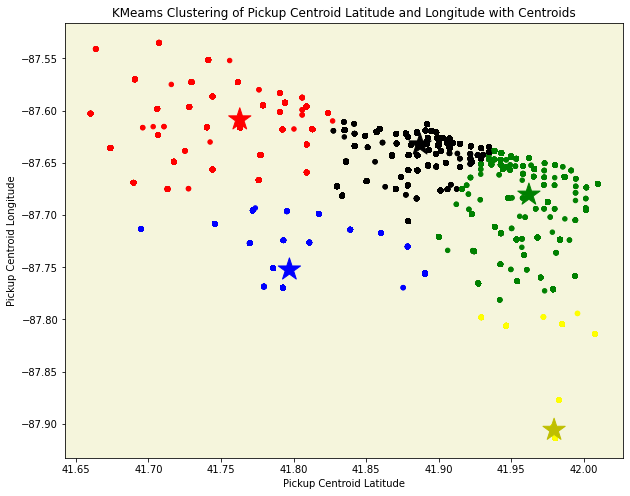

In [20]:
plt.figure(figsize=(7,7))
ax = new_df_label.plot(    
    kind="scatter", 
    x='Pickup Centroid Latitude', y='Pickup Centroid Longitude',
    figsize=(10,8),
    c = new_df_label['color']
)
ax.set_facecolor(("beige"))
centroids.plot(
    kind="scatter", 
    x="x1", y="x2",
    marker="*", c=["k", "y", "g", "b", "r"], s=550,
    ax = ax
)
plt.ylabel("Pickup Centroid Longitude")
plt.xlabel("Pickup Centroid Latitude")
plt.title("KMeams Clustering of Pickup Centroid Latitude and Longitude with Centroids")
plt.show()

### Testing for 4 Clusters

In [21]:
kmeans_4 = KMeans(n_clusters=4)
model_4 = kmeans_4.fit(new_df)
y_kmeans4 = kmeans_4.fit_predict(new_df)
y_kmeans4

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [22]:
kmeans_4.cluster_centers_

array([[ 41.88703156, -87.63236278],
       [ 41.97948163, -87.90583275],
       [ 41.77489346, -87.67991128],
       [ 41.96089327, -87.68176175]])

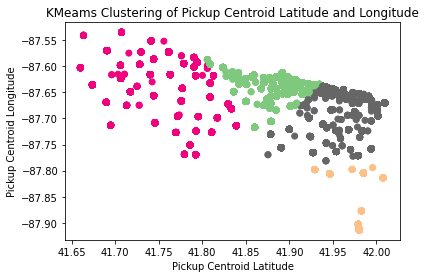

In [23]:
plt.scatter(X[:, 0], X[:, 1], c = y_kmeans4, cmap = 'Accent')
plt.ylabel("Pickup Centroid Longitude")
plt.xlabel("Pickup Centroid Latitude")
plt.title("KMeams Clustering of Pickup Centroid Latitude and Longitude")
plt.show()

In [24]:
new_df_label = new_df.copy()
new_df_label['label'] = pd.Series(model_4.labels_, index=new_df.index)
colors = ["black", "green", "blue", "red"]
new_df_label['color'] = new_df_label['label'].map(lambda k: colors[k])
new_df_label

,Pickup Centroid Latitude,Pickup Centroid Longitude,label,color
0,41.899602,-87.633308,0,black
1,41.899602,-87.633308,0,black
2,41.899602,-87.633308,0,black
3,41.892508,-87.626215,0,black
4,41.874005,-87.663518,0,black
...,...,...,...,...
292776,41.944227,-87.655998,3,red
292777,41.874005,-87.663518,0,black
292778,41.874005,-87.663518,0,black
292779,41.892508,-87.626215,0,black


In [25]:
centroids = pd.DataFrame(model_4.cluster_centers_, columns=["x1", "x2"])

<Figure size 504x504 with 0 Axes>

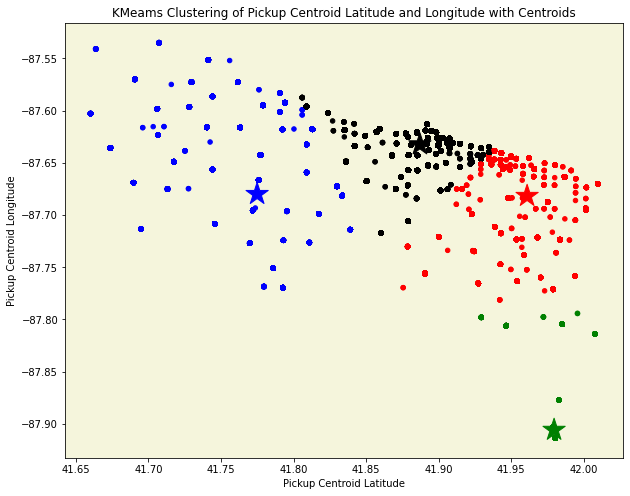

In [26]:
plt.figure(figsize=(7,7))
ax = new_df_label.plot(    
    kind="scatter", 
    x='Pickup Centroid Latitude', y='Pickup Centroid Longitude',
    figsize=(10,8),
    c = new_df_label['color']
)
ax.set_facecolor(("beige"))
centroids.plot(
    kind="scatter", 
    x="x1", y="x2",
    marker="*", c=["k", "g", "b", "r"], s=550,
    ax = ax
)
plt.ylabel("Pickup Centroid Longitude")
plt.xlabel("Pickup Centroid Latitude")
plt.title("KMeams Clustering of Pickup Centroid Latitude and Longitude with Centroids")
plt.show()

### As the KMeans clusters also included outliers in clustering, we might use another algorithm "DBSCAN" which might give better results w.r.t to outler

#### As the original dataset wasn't able to run on orion cluster, a sample dataset has been chosen

### Dataset

In [20]:
df_dbscan_sample = new_df.sample(frac=0.1, replace=True)
df_dbscan_sample

,Pickup Centroid Latitude,Pickup Centroid Longitude
108000,41.878866,-87.625192
19968,41.879255,-87.642649
240071,41.884987,-87.620993
196360,41.874005,-87.663518
200672,41.892042,-87.631864
...,...,...
43485,41.892042,-87.631864
149499,41.892073,-87.628874
94991,41.892508,-87.626215
176588,41.890922,-87.618868


### Scaling the data with Standard Scalar

In [21]:
scaler = StandardScaler()
X_dbscan = df_dbscan_sample.values
scaled_X_dbscan = scaler.fit_transform(X_dbscan)
scaled_X_dbscan

array([[-0.42872585,  0.47765133],
       [-0.41981479,  0.26636681],
       [-0.28867434,  0.5284756 ],
       ...,
       [-0.11661662,  0.46527257],
       [-0.15289587,  0.55418964],
       [ 0.06087049,  0.39393227]])

### Getting the nearest neighbours

In [22]:
# Ref: https://towardsdatascience.com/machine-learning-clustering-dbscan-determine-the-optimal-value-for-epsilon-eps-python-example-3100091cfbc

from sklearn.neighbors import NearestNeighbors

neighbors = NearestNeighbors(n_neighbors=10)
n_fit = neighbors.fit(scaled_X_dbscan)
distances, indices = n_fit.kneighbors(scaled_X_dbscan)
distances, indices

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([[15858,  2343,   341, ..., 17544, 17549,  7158],
        [  512, 10829, 10807, ...,  1551,  1713,  1481],
        [10916, 17685,  8969, ...,  5861, 23352,  5629],
        ...,
        [ 1067,  4358, 20020, ..., 15406,  7438,  1627],
        [17849, 13192,  6992, ..., 27305,   378, 19813],
        [ 2893, 12671, 11785, ..., 24539, 17200,  4832]]))

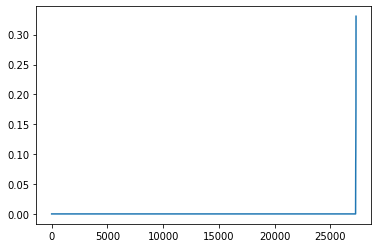

In [23]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [24]:
# Ref: https://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html

# DBSCAN
db = DBSCAN(eps=0.5, min_samples=10).fit(scaled_X_dbscan)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

In [25]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

In [26]:
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

Estimated number of clusters: 4
Estimated number of noise points: 22


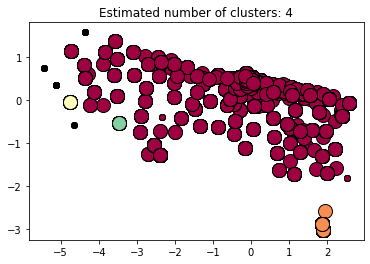

In [27]:
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = scaled_X_dbscan[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = scaled_X_dbscan[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

Text(0.5, 1.0, 'DBSCAN')

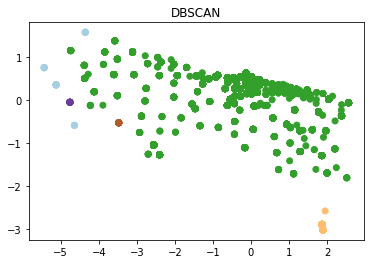

In [29]:
y_predict = db.fit_predict(scaled_X_dbscan)
plt.scatter(scaled_X_dbscan[:,0], scaled_X_dbscan[:,1], c = y_predict, cmap = 'Paired')
plt.title("DBSCAN")

#### 1. The reason why you chose the clustering algorithm(s)


As the dataset is not too dense and has a lot of variance, K-Means was used as it was easy to identify clusters from the alogorithm. Also, the speed of KMeans is highest, for the 150+MB dataset. KMeans made for sense than any other algorithm. As the KMeans clusters also included outliers in clustering, we used DBSCAN to get better results w.r.t to outlers.But, due to relative nearness between data points, DBSCAN clustered most of the data into big cluster.
So, KMeans is a better algorithms for this dataset.

#### 2. Any pre-processing of the data or any hyperparameter settings

Preprocessing - Null values were removed, to eliminate any issues that could have arised while running k-means or DBSCAN.

While running K-Means algorithm several times for obtaining the optimal k-values, various hyperparameters were configured.

`n_init, max_iter, tol, random_stat`

When running DBScan, values were scaled to get values under Normal (Gaussian) Distribution.


#### 3. Output from the algorithm(s) -- show what clusters were generated

Visualized KMeans above for k = 4 and 5, with/without centroids and DBSCAN proving that there were 4 Clusters in the dataset.

#### 4. The metrics you used to evaluate the output. What kind of performance did you get from that algorithm? Is that what you expected?
Metrics: How many clusters could either of the clustering algorithms build more accurately.
While KMeans have included the outliers as well, but it is still better than DMScan, as DBSCAN couldn't even segregate data points into diffrent cluster.

I expected the same from KMeans and DBScan. DBSCAN is better for compactness. As data is not so compact, this feels okay to me.